In [278]:
from collections import Counter
import random
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np

In [279]:
linear_graphs = [ig.Graph.Formula("1-2"), ig.Graph.Formula("1-2-3"), ig.Graph.Formula("1-2-3-4"), ig.Graph.Formula("1-2-3-4-5"), ig.Graph.Formula("1-2-3-4-5-6"), ig.Graph.Formula("1-2-3-4-5-6-7"), ig.Graph.Formula("1-2-3-4-5-6-7-8"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14-15"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18"), ig.Graph.Formula("1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19")]

0.5956


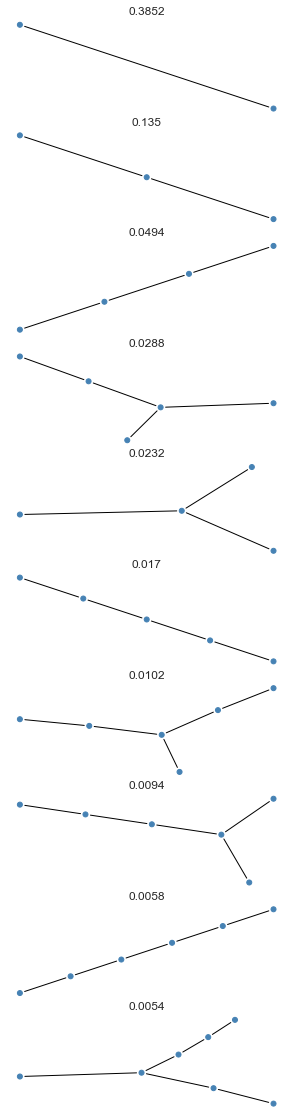

In [296]:
iso_types = []
counts = []
sample = 5000
n=6
for _ in range(sample):
    rg = ig.Graph.Erdos_Renyi(1000, 1/1000)#Tree_Game(n)
    random_node = random.randint(0, rg.vcount() - 1)
    neighbors = rg.neighbors(random_node)
    while len(neighbors) == 0:
        random_node = random.randint(0, rg.vcount() - 1)
        neighbors = rg.neighbors(random_node)
    random_neighbor = random.choice(neighbors)
    rg.delete_edges(rg.es.select(_source=random_node))
    rg.add_edge(random_node, random_neighbor)
    components = rg.components()
    nodes = components[components.membership[random_node]]
    rg = rg.subgraph(nodes)
    for i, g in enumerate(iso_types):
        if g.isomorphic(rg):
            counts[i] += 1
            break
    else:
        iso_types.append(rg)
        counts.append(1)

counts, iso_types = zip(*sorted(zip(counts, iso_types), key=lambda x: x[0], reverse=True))


# for every iso_type check if it is isomorphic to a linear graph
linear_counts = [counts[i] for i, g in enumerate(iso_types) if any(g.isomorphic(lg) for lg in linear_graphs)]
linear_sum = sum(linear_counts)

fig, axes = plt.subplots(len(counts[:10]), 1, figsize=(5, 2*len(counts[:10])))
for i, ax in enumerate(axes.ravel()):
    ax.set_title('{}'.format(counts[i]/sample))
    ax.grid()
    ax.axis('off')
    ig.plot(iso_types[i], target=ax)
print(linear_sum/sample)

In [280]:
samples = 10000
n = 1000
cs = np.arange(0.1, 2, 0.1)
linear_prob = []
for c in cs:
    counter = 0
    for _ in range(sample):
        rg = ig.Graph.Erdos_Renyi(1000, c / 1000)
        random_node = random.randint(0, rg.vcount() - 1)
        neighbors = rg.neighbors(random_node)
        while len(neighbors) == 0:
            random_node = random.randint(0, rg.vcount() - 1)
            neighbors = rg.neighbors(random_node)
        random_neighbor = random.choice(neighbors)
        rg.delete_edges(rg.es.select(_source=random_node))
        rg.add_edge(random_node, random_neighbor)
        components = rg.components()
        nodes = components[components.membership[random_node]]
        rg = rg.subgraph(nodes)
        for chain in linear_graphs:
            if chain.isomorphic(rg):
                counter += 1
                break
    linear_prob.append(counter / sample)
    print(c, counter / sample)

0.1 0.9958
0.2 0.9813
0.30000000000000004 0.9546
0.4 0.9231
0.5 0.8658
0.6 0.8192
0.7000000000000001 0.7631
0.8 0.7124
0.9 0.6345
1.0 0.5791
1.1 0.5264
1.2000000000000002 0.4696
1.3000000000000003 0.4226
1.4000000000000001 0.3867
1.5000000000000002 0.3375
1.6 0.2905
1.7000000000000002 0.2609
1.8000000000000003 0.2342
1.9000000000000001 0.2033


0.9157


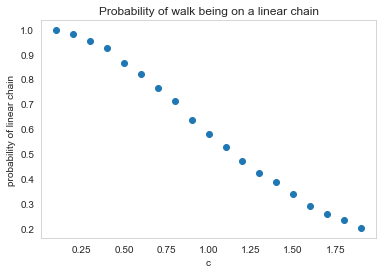

In [293]:
plt.scatter(cs, linear_prob)
plt.xlabel('c')
plt.ylabel('probability of linear chain')
plt.grid()
plt.title('Probability of walk being on a linear chain')
print(linear_sum/sample)

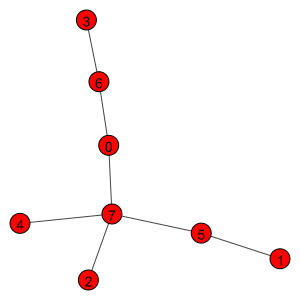

In [239]:
g = ig.Graph.Tree_Game(8)
ig.plot(g, vertex_label=g.vs.indices, bbox=(300,300))

0 6


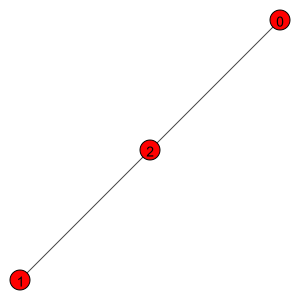

In [240]:
random_node = random.randint(0, g.vcount() - 1)
random_neighbor = random.choice(g.neighbors(random_node))
g.delete_edges(g.es.select(_source=random_node))
g.add_edge(random_node, random_neighbor)
components = g.components()
nodes = components[components.membership[random_node]]
g = g.subgraph(nodes)
print(random_node, random_neighbor)
ig.plot(g, vertex_label=g.vs.indices, bbox=(300,300))